In [98]:
import android
droid = android.Android()

In [97]:
!adb devices

List of devices attached
0123456789ABCDEF	device



In [96]:
!adb forward tcp:9999 tcp:7777

In [100]:
droid.makeToast("prueba")

Result(id=0, result=None, error=None)

In [117]:
def elegirsegundos():
    """
     Funcion para que el usuario capture los cantidad de segundos durante los cuales se realizara el censado
    """
    segundos=0
    droid.dialogCreateAlert("Elegir segundos a Censar")
    droid.dialogSetSingleChoiceItems(["3 seg","5 seg","Especificar"])
    droid.dialogSetPositiveButtonText("Aceptar")
    droid.dialogShow()
    droid.dialogGetResponse()
    respuesta=droid.dialogGetSelectedItems()
    if respuesta[1][0] == 0 :
        segundos = 3000
        droid.makeToast("segundos= "+str(segundos))
    if respuesta[1][0] == 1 :
        segundos = 5000
        droid.makeToast("segundos= "+str(segundos))
    if respuesta[1][0] == 2 :
        droid.dialogCreateInput("Especificar los segundos","Solo valores numéricos:","1","number").result
        droid.dialogSetPositiveButtonText("Aceptar")
        droid.dialogShow()
        Res_segundos = droid.dialogGetResponse().result
        segundos = int(Res_segundos['value'])
        segundos = segundos * 1000
        droid.makeToast(Res_segundos['value']+ " convertido a milisegundos es: "+str(segundos))
    return segundos

In [105]:
print segundos['value']

1


In [110]:
print segundos

3000


In [122]:
import pandas as pd
import time
%matplotlib inline

def capturaDatosAceleracion():
    """
            Una funcion simple que registra lecturas del acelerometro y las
            guarda en un DataFrame de pandas
    """
    aceleracion = []
    tiempoCensado = 0.
    tiempoTotal = elegirsegundos()

    droid.startSensingTimed(2,100)
    
    while tiempoCensado <= tiempoTotal:
        aceleracion.append(droid.sensorsReadAccelerometer().result)
        time.sleep(100/1000.00)
        tiempoCensado += 100
    droid.stopSensing();
    
    return pd.DataFrame(aceleracion, columns=["Ax","Ay","Az"])

#Aqui inicia la funcion que muestra un dialogo para solicitar al usuario los segundos a censar
def elegirsegundos():
    """
     Funcion para que el usuario capture los cantidad de segundos durante los cuales se realizara el censado
    """
    segundos=0
    droid.dialogCreateAlert("Elegir segundos a Censar")
    droid.dialogSetSingleChoiceItems(["3 seg","5 seg","Especificar"])
    droid.dialogSetPositiveButtonText("Aceptar")
    droid.dialogShow()
    droid.dialogGetResponse()
    respuesta=droid.dialogGetSelectedItems()
    if respuesta[1][0] == 0 :
        segundos = 3000
        droid.makeToast("segundos= "+str(segundos))
    if respuesta[1][0] == 1 :
        segundos = 5000
        droid.makeToast("segundos= "+str(segundos))
    if respuesta[1][0] == 2 :
        droid.dialogCreateInput("Especificar los segundos","Solo valores numéricos:","1","number").result
        droid.dialogSetPositiveButtonText("Aceptar")
        droid.dialogShow()
        Res_segundos = droid.dialogGetResponse().result
        segundos = int(Res_segundos['value'])
        segundos = segundos * 1000
        droid.makeToast(Res_segundos['value']+ " convertido a milisegundos es: "+str(segundos))
    return segundos

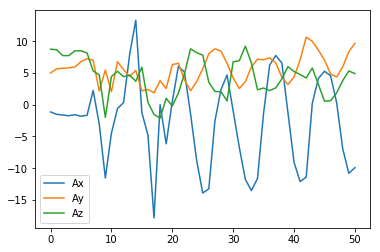

In [123]:
acel = capturaDatosAceleracion()
acel.plot()

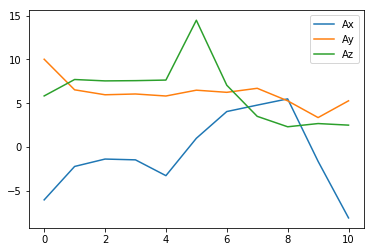

In [124]:
acel = capturaDatosAceleracion()
acel.plot()

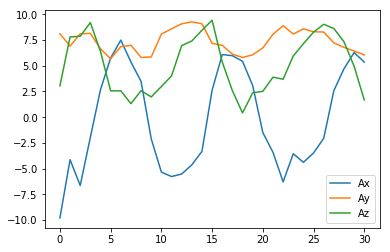

In [125]:
acel = capturaDatosAceleracion()
acel.plot()